In [49]:
# Import libraries
import numpy as np
import pandas as pd
import prettyplots as vs
import matplotlib.pyplot as plt

# Pretty display for notebooks
%matplotlib inline

In [50]:
# Read CDC Birth precessed data
data = pd.read_csv('data2014.csv')
print "CDC Birth data read successfully!"

CDC Birth data read successfully!


In [51]:
data.head()

,Unnamed: 0,bfacil3,mager9,mbstate_rec,mrace15,mhisp_r,mar_p,dmar,meduc,fagerec11,...,ume_forcep,ume_vac,uop_induc,uld_breech,uca_anen,uca_spina,uca_ompha,uca_cleftlp,uca_hernia,uca_downs
0,0,1,4,1,1.0,0,X,1,7.0,6,...,2,2,1,2,2,2,2,2,2,2
1,1,1,4,1,3.0,0,N,2,3.0,11,...,2,2,1,2,2,2,2,2,2,2
2,2,1,3,1,1.0,0,X,1,4.0,3,...,2,2,1,2,2,2,2,2,2,2
3,3,1,3,1,2.0,0,N,2,5.0,11,...,2,2,1,2,2,2,2,2,2,2
4,4,1,4,1,1.0,0,X,1,5.0,4,...,2,2,2,2,2,2,2,2,2,2


In [52]:
data.shape

(3994520, 128)

In [53]:
# Drop first unnamed column
data=data.drop(data.columns[[0]], axis=1)

data.head()


,bfacil3,mager9,mbstate_rec,mrace15,mhisp_r,mar_p,dmar,meduc,fagerec11,frace15,...,ume_forcep,ume_vac,uop_induc,uld_breech,uca_anen,uca_spina,uca_ompha,uca_cleftlp,uca_hernia,uca_downs
0,1,4,1,1.0,0,X,1,7.0,6,1.0,...,2,2,1,2,2,2,2,2,2,2
1,1,4,1,3.0,0,N,2,3.0,11,99.0,...,2,2,1,2,2,2,2,2,2,2
2,1,3,1,1.0,0,X,1,4.0,3,1.0,...,2,2,1,2,2,2,2,2,2,2
3,1,3,1,2.0,0,N,2,5.0,11,99.0,...,2,2,1,2,2,2,2,2,2,2
4,1,4,1,1.0,0,X,1,5.0,4,1.0,...,2,2,2,2,2,2,2,2,2,2


In [7]:
# Calculate number of patients
n_patients = data.shape[0]

# Calculate number of features
n_features = data.shape[1] - 1

# Calculate number of Vaginal deliveries
V_del = data.loc[data['dmeth_rec'] == 1]
n_V_del= V_del.shape[0]

# Calculate number of C-section deliveries
C_del = data.loc[data['dmeth_rec'] == 2]
n_C_del= C_del.shape[0]

# Calculate C-section delivey rate
C_del_rate = float ( n_C_del ) / n_patients * 100

# Print the results
print "Total number of patients: {}".format(n_patients)
print "Number of features: {}".format(n_features)
print "Number of patients who had Vaginal delivery: {}".format(n_V_del)
print "Number of patients who had C-Section: {}".format(n_C_del)
print "C-Section delivery rate: {:.2f}%".format(C_del_rate)

Total number of patients: 3994520
Number of features: 126
Number of patients who had Vaginal delivery: 2706620
Number of patients who had C-Section: 1287900
C-Section delivery rate: 32.24%


In [54]:
# Drop rows where there was no attempt in labor and then drop that columns 
data_no_trial= data.drop(data[data.me_trial == 'N'].index)
df=data_no_trial.drop('me_trial', axis=1)
df.shape

(3087737, 126)

In [9]:
df.dmeth_rec.value_counts()

1    2706620
2     381117
Name: dmeth_rec, dtype: int64

In [55]:
# Extract feature columns
X_all = df.drop('dmeth_rec', axis = 1)

# Extract target column of delivery method
y_all = df['dmeth_rec'] 


In [60]:
X_all = vs.PreprocessFeatures(X_all)
print "Processed feature columns ({} total features):\n{}".format(len(X_all.columns), list(X_all.columns))
print "\nFeature values after trasformation:"
print X_all.head()

Processed feature columns (255 total features):
['bfacil3', 'mager9', 'mbstate_rec', 'mrace15', 'mhisp_r', 'mar_p_N', 'mar_p_U', 'mar_p_X', 'mar_p_Y', 'dmar', 'meduc', 'fagerec11', 'frace15', 'fhisp_r', 'feduc_1.0', 'feduc_2.0', 'feduc_3.0', 'feduc_4.0', 'feduc_5.0', 'feduc_6.0', 'feduc_7.0', 'feduc_8.0', 'feduc_9.0', 'feduc_1.0', 'feduc_2.0', 'feduc_3.0', 'feduc_4.0', 'feduc_5.0', 'feduc_6.0', 'feduc_7.0', 'feduc_8.0', 'feduc_9.0', 'feduc_U', 'priorlive', 'priordead', 'priorterm', 'lbo_rec', 'tbo_rec', 'illb_r11', 'ilop_r11', 'ilp_r11', 'precare5', 'previs_rec', 'wic_N', 'wic_U', 'wic_Y', 'cig0_r', 'cig1_r', 'cig2_r', 'cig3_r', 'cig_rec_N', 'cig_rec_U', 'cig_rec_Y', 'm_ht_in', 'bmi_r', 'pwgt_r', 'dwgt_r', 'wtgain_rec', 'rf_pdiab_N', 'rf_pdiab_U', 'rf_pdiab_Y', 'rf_gdiab_N', 'rf_gdiab_U', 'rf_gdiab_Y', 'rf_phype_N', 'rf_phype_U', 'rf_phype_Y', 'rf_ghype_N', 'rf_ghype_U', 'rf_ghype_Y', 'rf_ehype_N', 'rf_ehype_U', 'rf_ehype_Y', 'rf_ppterm_N', 'rf_ppterm_U', 'rf_ppterm_Y', 'rf_inftr_N', '

In [62]:
from imblearn.under_sampling import RandomUnderSampler 
from collections import Counter
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_sample(X_all, y_all)
print('Original dataset shape {}'.format(Counter(y_all)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({1: 2706620, 2: 381117})
Resampled dataset shape Counter({1: 381117, 2: 381117})


In [117]:
0.141

0.0

In [102]:
data_res=pd.DataFrame(X_res, columns=list(X_all.columns))
data_res2=pd.DataFrame({'dmeth_rec': y_res})
data_res=pd.concat([data_res, data_res2], axis=1)
data_res.head()


,bfacil3,mager9,mbstate_rec,mrace15,mhisp_r,mar_p_N,mar_p_U,mar_p_X,mar_p_Y,dmar,...,ume_vac,uop_induc,uld_breech,uca_anen,uca_spina,uca_ompha,uca_cleftlp,uca_hernia,uca_downs,dmeth_rec
0,1.0,3.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,2.0,...,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2
1,1.0,3.0,1.0,2.0,0.0,0.0,0.0,1.0,0.0,1.0,...,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2
2,1.0,6.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2
3,1.0,4.0,1.0,15.0,0.0,0.0,0.0,0.0,1.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2
4,1.0,5.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2


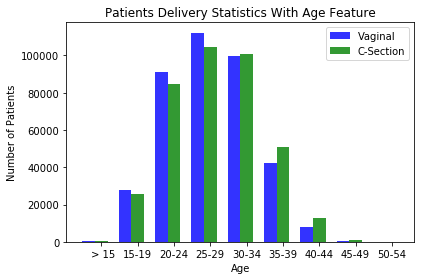

In [119]:
Age_df_V=df.drop(df[df.dmeth_rec == 2].index)
Age_V=list(Age_df_V['mager9']) 

age_v_1=Age_V.count(1)*0.141
age_v_2=Age_V.count(2)*0.141
age_v_3=Age_V.count(3)*0.141
age_v_4=Age_V.count(4)*0.141
age_v_5=Age_V.count(5)*0.141
age_v_6=Age_V.count(6)*0.141
age_v_7=Age_V.count(7)*0.141
age_v_8=Age_V.count(8)*0.141
age_v_9=Age_V.count(9)*0.141


Age_df_CS=df.drop(df[df.dmeth_rec == 1].index)
Age_CS=list(Age_df_CS['mager9'])

age_cs_1=Age_CS.count(1)
age_cs_2=Age_CS.count(2)
age_cs_3=Age_CS.count(3)
age_cs_4=Age_CS.count(4)
age_cs_5=Age_CS.count(5)
age_cs_6=Age_CS.count(6)
age_cs_7=Age_CS.count(7)
age_cs_8=Age_CS.count(8)
age_cs_9=Age_CS.count(9)


 
# data to plot
n_groups = 9
vag = (age_v_1, age_v_2, age_v_3, age_v_4, age_v_5, age_v_6, age_v_7, age_v_8, age_v_9)
cs = (age_cs_1, age_cs_2, age_cs_3, age_cs_4, age_cs_5, age_cs_6, age_cs_7, age_cs_8, age_cs_9)
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, vag, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Vaginal')
 
rects2 = plt.bar(index + bar_width, cs, bar_width,
                 alpha=opacity,
                 color='g',
                 label='C-Section')
 
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.title('Patients Delivery Statistics With Age Feature')
plt.xticks(index + bar_width, (' > 15', '15-19', '20-24', '25-29', '30-34', '35-39',
                               '40-44', '45-49', '50-54'))
plt.legend()
 
plt.tight_layout()
plt.show()

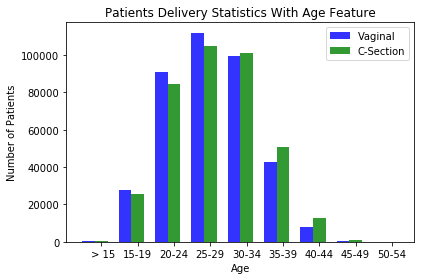

In [120]:
Age_df_V=data_res.drop(data_res[data_res.dmeth_rec == 2].index)
Age_V=list(Age_df_V['mager9']) 

age_v_1=Age_V.count(1)
age_v_2=Age_V.count(2)
age_v_3=Age_V.count(3)
age_v_4=Age_V.count(4)
age_v_5=Age_V.count(5)
age_v_6=Age_V.count(6)
age_v_7=Age_V.count(7)
age_v_8=Age_V.count(8)
age_v_9=Age_V.count(9)


Age_df_CS=data_res.drop(data_res[data_res.dmeth_rec == 1].index)
Age_CS=list(Age_df_CS['mager9'])

age_cs_1=Age_CS.count(1)
age_cs_2=Age_CS.count(2)
age_cs_3=Age_CS.count(3)
age_cs_4=Age_CS.count(4)
age_cs_5=Age_CS.count(5)
age_cs_6=Age_CS.count(6)
age_cs_7=Age_CS.count(7)
age_cs_8=Age_CS.count(8)
age_cs_9=Age_CS.count(9)


 
# data to plot
n_groups = 9
vag = (age_v_1, age_v_2, age_v_3, age_v_4, age_v_5, age_v_6, age_v_7, age_v_8, age_v_9)
cs = (age_cs_1, age_cs_2, age_cs_3, age_cs_4, age_cs_5, age_cs_6, age_cs_7, age_cs_8, age_cs_9)
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, vag, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Vaginal')
 
rects2 = plt.bar(index + bar_width, cs, bar_width,
                 alpha=opacity,
                 color='g',
                 label='C-Section')
 
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.title('Patients Delivery Statistics With Age Feature')
plt.xticks(index + bar_width, (' > 15', '15-19', '20-24', '25-29', '30-34', '35-39',
                               '40-44', '45-49', '50-54'))
plt.legend()
 
plt.tight_layout()
plt.show()

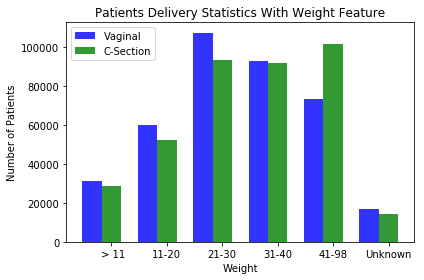

In [115]:
Weight_df_V=data_res.drop(data_res[data_res.dmeth_rec == 2].index)
Weight_V=list(Weight_df_V['wtgain_rec']) 

w_v_1=Weight_V.count(1)
w_v_2=Weight_V.count(2)
w_v_3=Weight_V.count(3)
w_v_4=Weight_V.count(4)
w_v_5=Weight_V.count(5)
w_v_9=Weight_V.count(9)


Weight_df_CS=data_res.drop(data_res[data_res.dmeth_rec == 1].index)
Weight_CS=list(Weight_df_CS['wtgain_rec'])

w_cs_1=Weight_CS.count(1)
w_cs_2=Weight_CS.count(2)
w_cs_3=Weight_CS.count(3)
w_cs_4=Weight_CS.count(4)
w_cs_5=Weight_CS.count(5)
w_cs_9=Weight_CS.count(9)


 
# data to plot
n_groups = 6
vag = (w_v_1, w_v_2, w_v_3, w_v_4, w_v_5, w_v_9)
cs = (w_cs_1, w_cs_2, w_cs_3, w_cs_4, w_cs_5, w_cs_9)
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, vag, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Vaginal')
 
rects2 = plt.bar(index + bar_width, cs, bar_width,
                 alpha=opacity,
                 color='g',
                 label='C-Section')
 
plt.xlabel('Weight')
plt.ylabel('Number of Patients')
plt.title('Patients Delivery Statistics With Weight Feature')
plt.xticks(index + bar_width, (' > 11', '11-20', '21-30', '31-40', '41-98', 'Unknown'))
plt.legend()
 
plt.tight_layout()
plt.show()

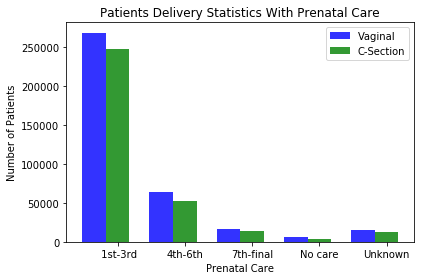

In [113]:
precare_df_V=data_res.drop(data_res[data_res.dmeth_rec == 2].index)

precare_V=list(Weight_df_V['precare5']) 

w_v_1=precare_V.count(1)
w_v_2=precare_V.count(2)
w_v_3=precare_V.count(3)
w_v_4=precare_V.count(4)
w_v_5=precare_V.count(5)


precare_df_CS=data_res.drop(data_res[data_res.dmeth_rec == 1].index)
precare_CS=list(Weight_df_CS['precare5'])

w_cs_1=precare_CS.count(1)
w_cs_2=precare_CS.count(2)
w_cs_3=precare_CS.count(3)
w_cs_4=precare_CS.count(4)
w_cs_5=precare_CS.count(5)


 
# data to plot
n_groups = 5
vag = (w_v_1, w_v_2, w_v_3, w_v_4, w_v_5)
cs = (w_cs_1, w_cs_2, w_cs_3, w_cs_4, w_cs_5)
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, vag, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Vaginal')
 
rects2 = plt.bar(index + bar_width, cs, bar_width,
                 alpha=opacity,
                 color='g',
                 label='C-Section')
 
plt.xlabel('Prenatal Care')
plt.ylabel('Number of Patients')
plt.title('Patients Delivery Statistics With Prenatal Care')
plt.xticks(index + bar_width, (' 1st-3rd', '4th-6th', '7th-final', 'No care', 'Unknown'))
plt.legend()
 
plt.tight_layout()
plt.show()



In [64]:
# Import any additional functionality you may need here
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, stratify = y_res, test_size=0.3, random_state=42)

# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

Training set has 533563 samples.
Testing set has 228671 samples.


In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from time import time

# Start the clock, train the classifier, then stop the clock

clf = LogisticRegression(random_state=42)

start_test = time()

y_pred_test = clf.fit(X_train, y_train).predict(X_test)
f1_test = f1_score(y_test, y_pred_test)

end_test = time()


# Print the results
# print "Trained model in {:.2f} seconds".format(end - start)
print "Made predictions in {:.2f} seconds".format(end_test - start_test)


# Print the results of prediction for both training and testing
# print "F1 score for training set: {:.8f}.".format(f1_train)
print "F1 score for test set: {:.8f}.".format(f1_test)

Made predictions in 545.41 seconds
F1 score for test set: 0.76322100.


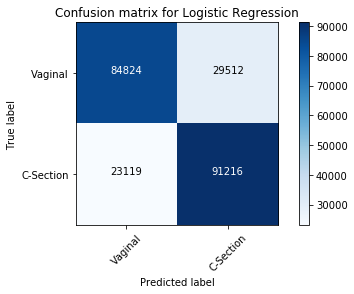

In [66]:
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(y_test, y_pred_test)

# Set binary target as 'yes' and 'no'
target=np.array(['Vaginal', 'C-Section'])

# Plot non-normalized confusion matrix foe each classifier
plt.figure()
vs.PlotConfusionMatrix(cnf_matrix, classes=target,
                      title='Confusion matrix for Logistic Regression')


In [67]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()
start_rf = time()

y_pred = clf.fit(X_train, y_train).predict(X_train)
f1_rf_test = f1_score(y_train, y_pred)

end_rf=time()

print "Made predictions in {:.2f} seconds".format(end_rf - start_rf)
print "F1 score for test set: {:.8f}.".format(f1_rf_test)

Made predictions in 55.29 seconds
F1 score for test set: 0.98886342.


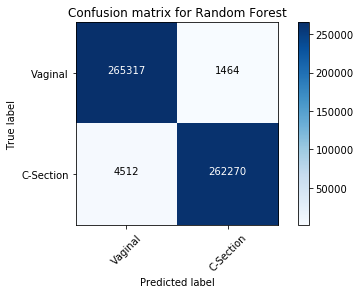

In [68]:
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(y_train, y_pred)

# Set binary target as 'yes' and 'no'
target=np.array(['Vaginal', 'C-Section'])

# Plot non-normalized confusion matrix foe each classifier
plt.figure()
vs.PlotConfusionMatrix(cnf_matrix, classes=target,
                      title='Confusion matrix for Random Forest')

In [69]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()
start_rf = time()

y_pred = clf.fit(X_train, y_train).predict(X_test)
f1_rf_test = f1_score(y_test, y_pred)

end_rf=time()

print "Made predictions in {:.2f} seconds".format(end_rf - start_rf)
print "F1 score for test set: {:.8f}.".format(f1_rf_test)

Made predictions in 49.74 seconds
F1 score for test set: 0.78112400.


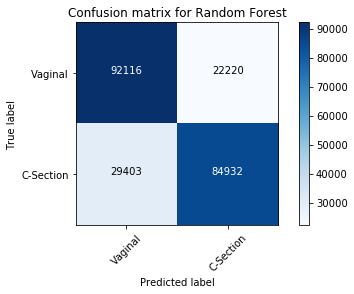

In [70]:
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(y_test, y_pred)

# Set binary target as 'yes' and 'no'
target=np.array(['Vaginal', 'C-Section'])

# Plot non-normalized confusion matrix foe each classifier
plt.figure()
vs.PlotConfusionMatrix(cnf_matrix, classes=target,
                      title='Confusion matrix for Random Forest')

In [74]:
# Import 'GridSearchCV' and 'make_scorer'
from sklearn.grid_search import GridSearchCV

# Create the parameters list you wish to tune
parameters = {'n_estimators':[35, 40, 45, 50, 55], 'max_depth':[50]}

# Initialize the classifier
clf=RandomForestClassifier(random_state=42)
# Perform grid search on the classifier using the f1_scorer as the scoring method
grid_obj = GridSearchCV(clf, parameters)

# Fit the grid search object to the training data and find the optimal parameters
grid_obj = grid_obj.fit(X_train, y_train)

# Get the estimator
clf = grid_obj.best_estimator_

y_pred = clf.fit(X_train, y_train).predict(X_test)

# Make an f1 scoring function using 'make_scorer' 
f1_tune_test = f1_score(y_test, y_pred)


# Report the final F1 score for training and testing after parameter tuning
print "Tuned model has a testing F1 score of {:.8f}.".format(f1_tune_test)
print("Best parameters set found on development set:")
print
print(grid_obj.best_estimator_)

Tuned model has a testing F1 score of 0.79484941.
Best parameters set found on development set:

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=50, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=55, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False)


In [78]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(max_depth=50,n_estimators=65, random_state=42)
start_rf = time()

y_pred = clf.fit(X_train, y_train).predict(X_test)
f1_rf_test = f1_score(y_test, y_pred)

end_rf=time()

print "Made predictions in {:.2f} seconds".format(end_rf - start_rf)
print "F1 score for test set: {:.8f}.".format(f1_rf_test)

Made predictions in 324.26 seconds
F1 score for test set: 0.79588411.


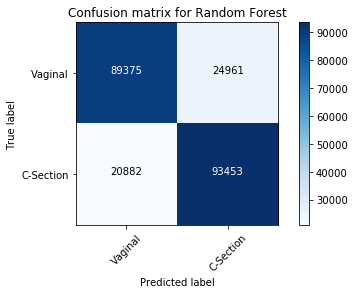

In [79]:
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(y_test, y_pred)

# Set binary target as 'yes' and 'no'
target=np.array(['Vaginal', 'C-Section'])

# Plot non-normalized confusion matrix foe each classifier
plt.figure()
vs.PlotConfusionMatrix(cnf_matrix, classes=target,
                      title='Confusion matrix for Random Forest')

Feature ranking:
1. feature 169 (0.049490)
2. feature 56 (0.040189)
3. feature 153 (0.038600)
4. feature 38 (0.036253)
5. feature 55 (0.034344)
6. feature 53 (0.030336)
7. feature 165 (0.030033)
8. feature 42 (0.026533)
9. feature 36 (0.023630)
10. feature 33 (0.022359)
11. feature 167 (0.021289)
12. feature 40 (0.020365)
13. feature 1 (0.020257)
14. feature 168 (0.020244)
15. feature 57 (0.020204)
16. feature 11 (0.019981)
17. feature 91 (0.019190)
18. feature 10 (0.019020)
19. feature 37 (0.016994)
20. feature 246 (0.015876)
21. feature 54 (0.015613)
22. feature 124 (0.014212)
23. feature 130 (0.013875)
24. feature 134 (0.013704)
25. feature 126 (0.012350)
26. feature 88 (0.011750)
27. feature 132 (0.011659)
28. feature 248 (0.010876)
29. feature 12 (0.010272)
30. feature 41 (0.010244)
31. feature 157 (0.010024)
32. feature 13 (0.009961)
33. feature 4 (0.009889)
34. feature 3 (0.009837)
35. feature 133 (0.009321)
36. feature 90 (0.009128)
37. feature 35 (0.008641)
38. feature 166 (0.

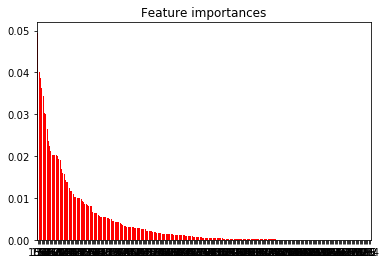

In [73]:
# Display important features in descending order

# coefs=clf.coef_.ravel()
# names = list(X_all.columns)

# importances = pd.DataFrame({'cols':names, 'imps':np.abs(coefs)})
# print importances.sort(['imps'], ascending=False)

# N=20
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_test.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_test.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(X_test.shape[1]), indices)
plt.xlim([-1, X_test.shape[1]])
plt.show()

